<a href="https://colab.research.google.com/github/JSGC-ECI/APE2/blob/main/RN_lab_sergio_idarraga_t_juan_guayazan_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESCUELA COLOMBIANA DE INGENIERÍA
# PRINCIPIOS Y TECNOLOGÍAS IA 2025-2
## REDES NEURONALES
## LABORATORIO 1/4

## Integrantes:

**Juan Sebastian Guayazan Clavijo**

**Sergio Alejandro Idarraga Torres**

**OBJETIVOS**

Desarrollar competencias básicas para:
1. Modelar y resolver problemas usando redes neuronales
2. Implementar los algoritmos hacia adelante (FEED-FORWARD) y hacia atrás con  aprendizaje (BACKPROPAGATION)
3. Apropiar un framework para redes neuronales (*keras*)

**ENTREGABLE**


*Reglas para el envío de los entregables*:

* **Forma de envío:**
Esta tarea se debe enviar únicamente a través de la plataforma Moodle en la actividad definida. Se tendrán dos entregas: inicial y final.

* **Formato de los archivos:**
Incluyan en un archivo *.zip* los archivos correspondientes al laboratorio.

* **Nomenclatura para nombrar los archivos:**
El archivo deberá ser renombrado, “RN-lab-” seguido por los usuarios institucionales de los autores ordenados alfabéticamente (por ejemplo, se debe adicionar pedroperez al nombre del archivo, si el correo electrónico de Pedro Pérez es pedro.perez@mail.escuelaing.edu.co)




# PARTE I. IMPLEMENTACIÓN DE RED NEURONAL

Para este apartado se va a implementar una red neuronal con algoritmo de aprendizaje, en este caso propagación hacia atras del error.

*Introducido en la década de 1960 y popularizado casi 30 años después (1989) por Rumelhart, Hinton y Williams en el artículo titulado «Learning representations by back-propagating errors».*

## IMPLEMENTACIÓN DE RED NEURONAL CON PROPAGACIÓN HACIA ATRÁS

Implementar una red neuronal totalmente conectada desde su definición simple; calculando una salida $\check{Y} (Yp)$ para unas entradas $X$.

**Propiedades y parámetros:**

*   Tarea: **Clasificación multiple**
*   Tipo de capas: **Densas**
*   Métrica para evaluación : **ACCURACY**

<div>
<img src="https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b20d_644af5900694f1102fb9b470_classification_guide_apc05.png" width="350"/>
</div>

> **Funciones de activación**

*   Función de activación en *Capas ocultas* : **ReLU**

<div>
<img src="https://intuitivetutorial.com/wp-content/uploads/2023/07/ReLU-1.png" width="350"/>
</div>

*   Función de activación en *Capa de salida* : **Sigmoide**

<div>
<img src="https://doimages.nyc3.cdn.digitaloceanspaces.com/010AI-ML/content/images/2018/06/sigm.png" width="350"/>
</div>

> **Funcion de costo**

*   Función de costo/perdida «error»: **Entropia Cruzada «Cross-Entropy»**

<div>
<img src="https://framerusercontent.com/images/jiDTkbQC7DPO2z2XmxqoeMsrkA.webp?width=1300&height=508" width="450"/>
</div>







## Paso 1. Derivadas

*Incluya en este apartado el proceso de la derivación de las funciones*

---
**Derivada función Sigmoide:**

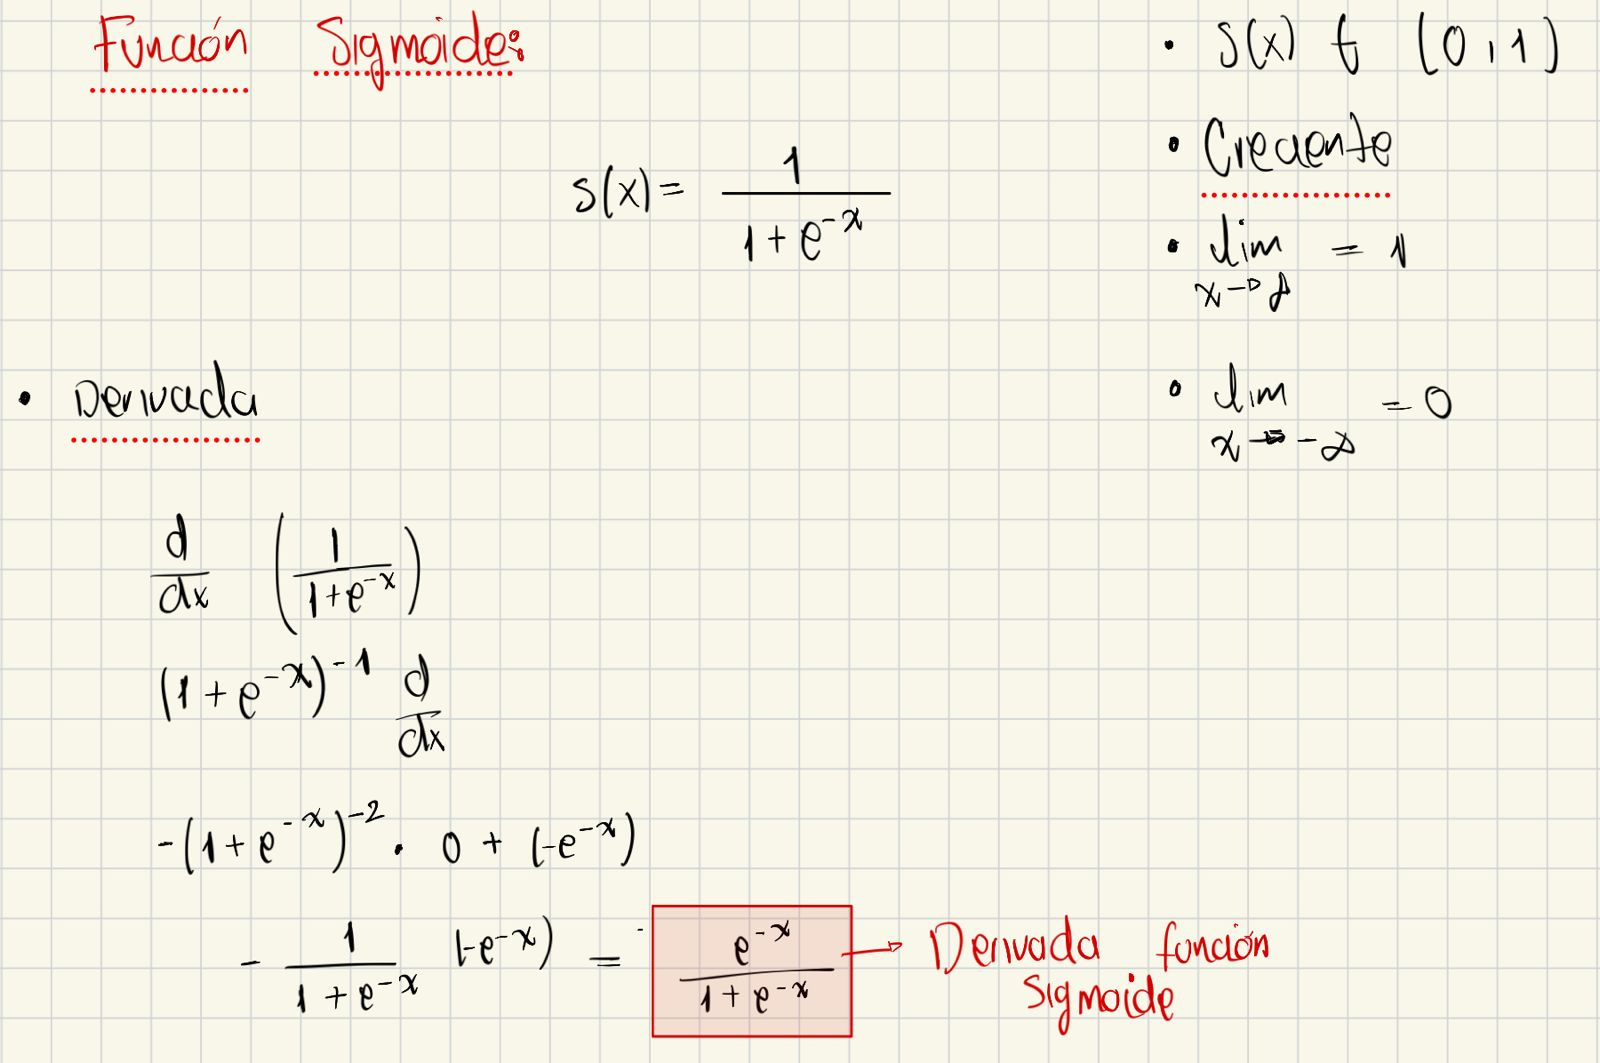



### Derivada función ReLU

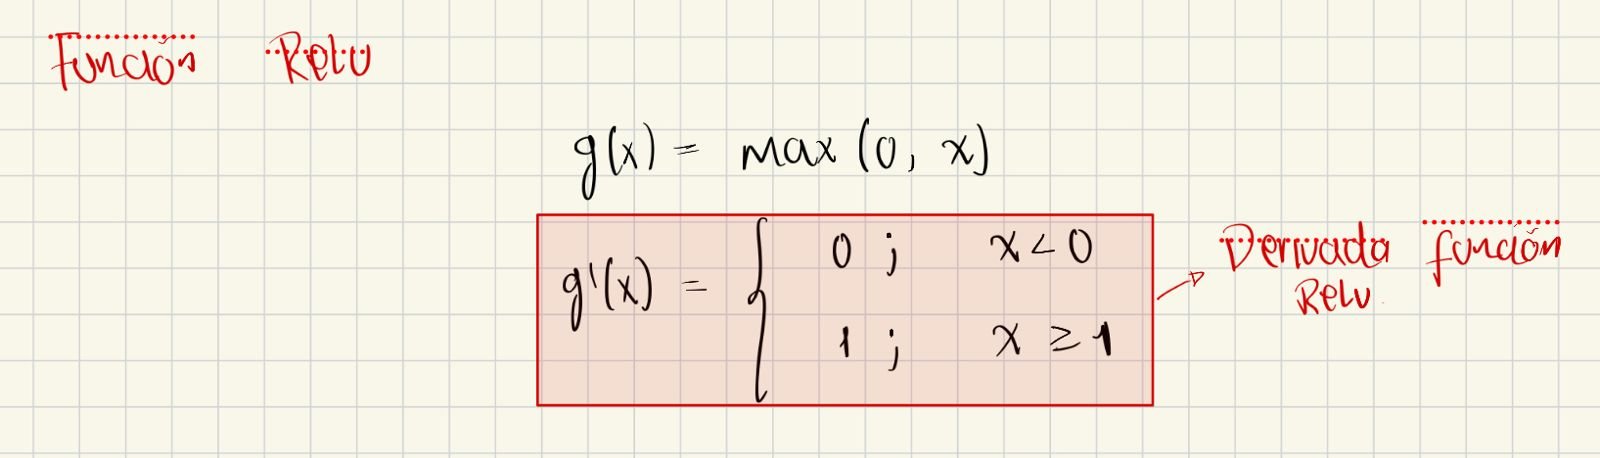


### Derivada función de costo: Entropía Cruzada



## Paso 2. Implementación del código para ANN (Dense)

### LIBRERÍA NECESARIA

In [144]:
import numpy as np
from abc import ABC, abstractmethod
from typing import List

### FUNCIONES DE BASE: MÉTRICA, COSTO Y ACTIVACIÓN

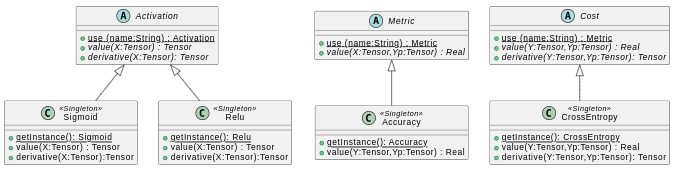

###MÉTRICA

In [145]:
class Metric(ABC):
    """Clase abstracta para definir una métrica de desempeño."""

    @abstractmethod
    def use(self, name: str) -> "Metric":
        pass

    @abstractmethod
    def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
        pass

In [146]:
# Documentar los métodos implementados
class Accuracy(Metric):

  def Acurracy(self):
    if name.lower() == "accuracy":
            return Accuracy()
    else:
            raise ValueError(f"Métrica '{name}' no implementada.")

  #def use(self, name: str) -> self:
   # return super().use(name)

  def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:

      if Y.ndim > 1:
        Y = np.argmax(Y, axis=1)
      if Yp.ndim > 1:
        Yp = np.argmax(Yp, axis=1)

      return np.mean(Y == Yp)


###COSTO

In [147]:
class Cost(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier función de costo
  Representa la función de costo o error de una red neuronal
  """
  @staticmethod
  def use(name: str) -> "Cost":
      name = name.lower()
      if name in ["crossentropy", "ce"]:
          return CrossEntropy.getInstance()
      else:
          raise ValueError(f"Función de costo '{name}' no soportada")

  def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
    pass

  def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
    pass

In [148]:
# Documentar los métodos implementados
class CrossEntropy(Cost):
  """ Función de costo Entropia Cruzada. Implementa Cost"""

  __instance = None

  def __init__(self):
        pass

  @staticmethod
  def getInstance():
        if CrossEntropy.__instance is None:
            CrossEntropy.__instance = CrossEntropy()
        return CrossEntropy.__instance

  def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
        eps = 1e-15
        Yp = np.clip(Yp, eps, 1 - eps)
        return -np.mean(Y * np.log(Yp) + (1 - Y) * np.log(1 - Yp))

  def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
        eps = 1e-15
        Yp = np.clip(Yp, eps, 1 - eps)
        return -(Y / Yp) + ((1 - Y) / (1 - Yp))


In [149]:
# Adicione los casos de prueba de los métodos implementados

Y = np.array([1, 0, 1])
Yp = np.array([0.9, 0.2, 0.8])

# Se obtiene la función de costo desde Cost
cost_fn = Cost.use("crossentropy")

print("Valor de CrossEntropy:", cost_fn.value(Y, Yp))
print("Derivada de CrossEntropy:", cost_fn.derivative(Y, Yp))

Valor de CrossEntropy: 0.18388253942874858
Derivada de CrossEntropy: [-1.11111111  1.25       -1.25      ]


###ACTIVACION

In [150]:
class Activation(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave de cualquier función de activación
  Representa la función de activación de cualquier neurona en la red neuronal"""

  def use(name: str) -> "Activation":

    name = name.lower()
    if name == "sigmoid":
        return Sigmoid.getInstance()
    elif name == "relu":
        return Relu.getInstance()
    else:
        raise ValueError(f"Función de activación '{name}' no soportada")

  def value(self, X: np.ndarray) -> np.ndarray:
    """ computa la función de activación <elemento por elemento>
    Args:
      X (ndarray): valores de entrada
    Returns:
      S (ndarray): valores de computo de la función de activación
    """
    pass

  def derivative(self, X: np.ndarray) -> np.ndarray:
    """ computa la derivada de la función de activación (gradiente) <elemento por elemento>
    Args:
      X (ndarray): valores de entrada
    Returns:
      ∇E(X) (ndarray): valores para la derivada de función de activación
    """
    pass

In [151]:
class Sigmoid(Activation):

  __instance = None

  def __init__(self):
      pass

  @staticmethod
  def getInstance():
      if Sigmoid.__instance is None:
          Sigmoid.__instance = Sigmoid()
      return Sigmoid.__instance

  def value(self, X: np.ndarray) -> np.ndarray:
      """ σ(x) = 1 / (1 + e^(-x)) """
      return 1 / (1 + np.exp(-X))

  def derivative(self, X: np.ndarray) -> np.ndarray:
      """ σ'(x) = σ(x) * (1 - σ(x)) """
      s = self.value(X)
      return s * (1 - s)


In [152]:

class Relu(Activation):

   __instance = None

   def __init__(self):
      pass

   @staticmethod
   def getInstance():
      if Relu.__instance is None:
          Relu.__instance = Relu()
      return Relu.__instance

   def value(self, X: np.ndarray) -> np.ndarray:
      """ f(x) = max(0, x) """
      return np.maximum(0, X)

   def derivative(self, X: np.ndarray) -> np.ndarray:
      """ f'(x) = 1 si x>0, 0 si x<=0 """
      return (X > 0).astype(float)

In [153]:
# Adicione los casos de prueba de los métodos implementados

X = np.array([-2, -1, 0, 1, 2])

# Probar con fábrica
sig = Activation.use("sigmoid")
relu = Activation.use("relu")

print("==== Sigmoid ====")
print("Input:", X)
print("Sigmoid(X):", sig.value(X))
print("Sigmoid'(X):", sig.derivative(X))

print("\n==== ReLU ====")
print("Input:", X)
print("ReLU(X):", relu.value(X))
print("ReLU'(X):", relu.derivative(X))

==== Sigmoid ====
Input: [-2 -1  0  1  2]
Sigmoid(X): [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Sigmoid'(X): [0.10499359 0.19661193 0.25       0.19661193 0.10499359]

==== ReLU ====
Input: [-2 -1  0  1  2]
ReLU(X): [0 0 0 1 2]
ReLU'(X): [0. 0. 0. 1. 1.]


## RED NEURONAL TOTALMENTE CONECTADA «DENSE»

####Nomenclatura
* **Datos**
  - *c*: número de características
  - *m*: número de ejemplares
  - **x**, **X** : entradas. Un ejemplo (c) o todos los ejemplos (cxm)
  - **y**, **Y** : salidas reales. Un ejemplo (cx1) o todos los ejemplos(cxm)
  - **yp**, **Yp** : salidas estimadas. Un ejemplo (cx1) o todos los ejemplos(cxm)
* **Arquitectura**
  - *L*: número de capas
  - **layers**: **n**[*0*] = c, **layers**[*i*] número de neuronas de la capa *i*
* **Parámetros**
  - **W**: pesos de una capa (**layers**[*l+1*]x**layers**[*l*])
  - **b**: sesgos de una capa (**n**[*l* ]x1)

* **Gradientes**
  - **dW**: gradiente de **W**
  - **db**: gradiente de **b**

*Incluya en este apartado el proceso de la derivación de los gradientes*

---
**Gradiente dW**


---
**Graciente db**


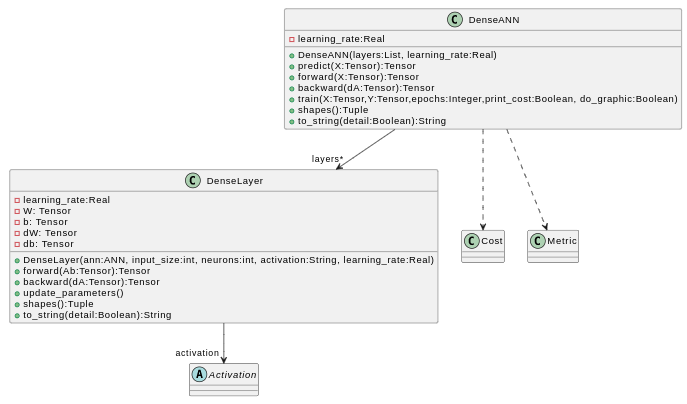

In [154]:
class DenseANN:
  """ Representa una red neuronal totalmente conectada """

  def __init__(self, layers: List[int], learning_rate: float):

        self.layers = layers
        self.learning_rate = learning_rate
        self.L = len(layers) - 1  # número de capas con pesos

        # Inicializar parámetros
        self.W = {}
        self.b = {}
        for l in range(1, len(layers)):
            self.W[l] = np.random.randn(layers[l], layers[l-1]) * 0.01
            self.b[l] = np.zeros((layers[l], 1))

        # Para almacenar valores durante forward
        self.Z = {}
        self.A = {}

  def predict(self, X: np.ndarray):

    A = X
    for l in range(1, self.L + 1):
        Z = np.dot(self.W[l], A) + self.b[l]
        A = 1 / (1 + np.exp(-Z))  # Sigmoid por defecto
        self.Z[l] = Z
        self.A[l] = A
    return A

  def forward(self, X: np.ndarray):
    self.A[0] = X
    return self.predict(X)

  def backward(self, X: np.ndarray, Y: np.ndarray):

    m = X.shape[1]  # número de ejemplos
    grads_W = {}
    grads_b = {}

    # Inicializar con derivada del costo (MSE o cross entropy)
    AL = self.A[self.L]
    dZ = AL - Y  # derivada para cross-entropy + sigmoid

    for l in reversed(range(1, self.L + 1)):
        grads_W[l] = (1/m) * np.dot(dZ, self.A[l-1].T)
        grads_b[l] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        if l > 1:  # si no es la primera capa
            dA_prev = np.dot(self.W[l].T, dZ)
            dZ = dA_prev * (self.A[l-1] * (1 - self.A[l-1]))  # derivada sigmoid

    # Actualizar parámetros
    for l in range(1, self.L + 1):
        self.W[l] -= self.learning_rate * grads_W[l]
        self.b[l] -= self.learning_rate * grads_b[l]

  def train(self, X: np.ndarray, Y: np.ndarray, epochs: int, print_cost: bool, do_graphic: bool, verbose_every: int = 100):
    costs = []
    for i in range(epochs):
        AL = self.forward(X)
        cost = -np.mean(Y*np.log(AL+1e-8) + (1-Y)*np.log(1-AL+1e-8))  # cross-entropy

        self.backward(X, Y)

        if print_cost and i % verbose_every == 0:
            print(f"Epoch {i}, cost: {cost:.4f}")
        costs.append(cost)
    return costs


  def shapes(self):

    shapes = {"layers": list(self.layers), "W": {}, "b": {}}
    total_params = 0

    if not hasattr(self, "W") or not hasattr(self, "b"):
        shapes["total_params"] = 0
        return shapes

    for l in range(1, self.L + 1):
        w_shape = tuple(self.W[l].shape)
        b_shape = tuple(self.b[l].shape)
        shapes["W"][l] = w_shape
        shapes["b"][l] = b_shape
        total_params += int(np.prod(w_shape)) + int(np.prod(b_shape))

    shapes["total_params"] = total_params
    return shapes

  def to_string(self):
    s = []
    s.append("DenseNN summary")
    s.append(f" Layers: {self.layers}")
    s.append(f" Num parametric layers: {self.L}")
    s.append(f" Learning rate: {self.learning_rate}")
    # obtener shapes
    info = self.shapes()
    s.append(f" Total params: {info.get('total_params', 0)}")
    s.append(" Parameter shapes:")
    W_info = info.get("W", {})
    b_info = info.get("b", {})
    for l in range(1, self.L + 1):
        s.append(f"  Layer {l}: W{l} {W_info.get(l)} , b{l} {b_info.get(l)}")
    return "\n".join(s)

  def __str__(self):
      return self.to_string()

In [155]:
# Casos de prueba

nn = DenseANN(layers=[2, 4, 3, 1], learning_rate=0.01)

# shapes()
sh = nn.shapes()
print("shapes() ->", sh)

print("\nResumen con to_string():\n")
print(nn.to_string())
print("\nprint(nn):\n")
print(nn)


shapes() -> {'layers': [2, 4, 3, 1], 'W': {1: (4, 2), 2: (3, 4), 3: (1, 3)}, 'b': {1: (4, 1), 2: (3, 1), 3: (1, 1)}, 'total_params': 31}

Resumen con to_string():

DenseNN summary
 Layers: [2, 4, 3, 1]
 Num parametric layers: 3
 Learning rate: 0.01
 Total params: 31
 Parameter shapes:
  Layer 1: W1 (4, 2) , b1 (4, 1)
  Layer 2: W2 (3, 4) , b2 (3, 1)
  Layer 3: W3 (1, 3) , b3 (1, 1)

print(nn):

DenseNN summary
 Layers: [2, 4, 3, 1]
 Num parametric layers: 3
 Learning rate: 0.01
 Total params: 31
 Parameter shapes:
  Layer 1: W1 (4, 2) , b1 (4, 1)
  Layer 2: W2 (3, 4) , b2 (3, 1)
  Layer 3: W3 (1, 3) , b3 (1, 1)


## CAPA CON PERCEPTRONES

In [156]:
class DenseLayer:
  """ Representa una capa (oculta o salida) en la red neuronal """
  def __init__(self, input_size: int, neurons: int, activation: str, learning_rate: float):

    self.input_size = input_size
    self.neurons = neurons
    self.activation = Activation.use(activation)
    self.learning_rate = learning_rate

    # inicialización aleatoria de pesos y sesgos
    self.W = np.random.randn(neurons, input_size) * 0.01
    self.b = np.zeros((neurons, 1))

    # gradientes
    self.dW = None
    self.db = None

    # caché de forward
    self.Z = None
    self.A = None

  def forward(self, Ab: np.ndarray):

    self.Z = np.dot(self.W, A_prev) + self.b
    self.A = self.activation.value(self.Z)
    return self.A

  def backward(self, Ab: np.ndarray):

    m = A_prev.shape[1]

    # derivada de la activación
    dZ = dA * self.activation.derivative(self.Z)
    self.dW = (1/m) * np.dot(dZ, A_prev.T)
    self.db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(self.W.T, dZ)

    return dA_prev

  def update_parameters(self):
    """ Actualiza los parámetros de la capa a partir del gradiente y el error.
    Return:
    """
    self.W -= self.learning_rate * self.dW
    self.b -= self.learning_rate * self.db

  def shapes(self):
    """ genera los valores asociados al tamaño de la capa
    Return:
      s (tupla<int>): tamaño de la capa
    """
    return {
            "W": self.W.shape,
            "b": self.b.shape,
            "neurons": self.neurons,
            "input_size": self.input_size
        }

  def to_string(self, detail: bool):
    s = f"DenseLayer(input={self.input_size}, neurons={self.neurons}, activation={self.activation.__class__.__name__})"
    if detail:
        s += f"\n  W: {self.W.shape}, b: {self.b.shape}"
    return s

In [157]:
# Datos de entrada
X = np.array([[0,0,1,1],[0,1,0,1]])

Y_and = np.array([[0,0,0,1]])  # AND
Y_or  = np.array([[0,1,1,1]])  # OR
Y_xor = np.array([[0,1,1,0]])  # XOR


In [158]:
# Como primer caso de prueba entrene un perceptrón para calcular el operador lógico and. Explique los resultados.
nn_and = DenseANN(layers=[2,1], learning_rate=0.1)
nn_and.train(X, Y_and, epochs=5000, print_cost=True, do_graphic=False)

print("\nPredicciones AND:")
print(nn_and.predict(X))

Epoch 0, cost: 0.6932
Epoch 100, cost: 0.4620
Epoch 200, cost: 0.3631
Epoch 300, cost: 0.3017
Epoch 400, cost: 0.2595
Epoch 500, cost: 0.2282
Epoch 600, cost: 0.2039
Epoch 700, cost: 0.1845
Epoch 800, cost: 0.1684
Epoch 900, cost: 0.1549
Epoch 1000, cost: 0.1434
Epoch 1100, cost: 0.1334
Epoch 1200, cost: 0.1248
Epoch 1300, cost: 0.1171
Epoch 1400, cost: 0.1103
Epoch 1500, cost: 0.1043
Epoch 1600, cost: 0.0988
Epoch 1700, cost: 0.0939
Epoch 1800, cost: 0.0894
Epoch 1900, cost: 0.0853
Epoch 2000, cost: 0.0816
Epoch 2100, cost: 0.0782
Epoch 2200, cost: 0.0750
Epoch 2300, cost: 0.0721
Epoch 2400, cost: 0.0694
Epoch 2500, cost: 0.0669
Epoch 2600, cost: 0.0645
Epoch 2700, cost: 0.0623
Epoch 2800, cost: 0.0603
Epoch 2900, cost: 0.0583
Epoch 3000, cost: 0.0565
Epoch 3100, cost: 0.0548
Epoch 3200, cost: 0.0532
Epoch 3300, cost: 0.0517
Epoch 3400, cost: 0.0503
Epoch 3500, cost: 0.0489
Epoch 3600, cost: 0.0476
Epoch 3700, cost: 0.0464
Epoch 3800, cost: 0.0452
Epoch 3900, cost: 0.0441
Epoch 4000, 

In [159]:
# Como segundo caso de prueba entrene un perceptrón para calcular el operador lógico or. Explique los resultados.
nn_or = DenseANN(layers=[2,1], learning_rate=0.1)
nn_or.train(X, Y_or, epochs=5000, print_cost=False, do_graphic=False)
print("Predicciones OR:", nn_or.predict(X))

Predicciones OR: [[0.04129929 0.98353612 0.98353676 0.99998793]]


In [160]:
# Como tercer caso de prueba entrene un perceptrón para calcular el operador lógico xor. Explique los resultados.
nn_xor = DenseANN(layers=[2,1], learning_rate=0.1)
nn_xor.train(X, Y_xor, epochs=5000, print_cost=False, do_graphic=False)

print("\nPredicciones XOR (perceptrón simple):")
print(nn_xor.predict(X))


Predicciones XOR (perceptrón simple):
[[0.5 0.5 0.5 0.5]]


In [161]:
# Como cuarto caso de prueba entrene un perceptrón multicapa [2,2,1] para calcular el operador lógico xor. Explique los resultados
nn_xor_mc = DenseANN(layers=[2,2,1], learning_rate=0.1)
nn_xor_mc.train(X, Y_xor, epochs=10000, print_cost=False, do_graphic=False)

print("\nPredicciones XOR (red multicapa [2,2,1]):")
print(nn_xor_mc.predict(X))


Predicciones XOR (red multicapa [2,2,1]):
[[0.50000408 0.50000401 0.499996   0.49999593]]


DenseNN summary
 Layers: [2, 8, 1]
 Num parametric layers: 2
 Learning rate: 0.1
 Total params: 33
 Parameter shapes:
  Layer 1: W1 (8, 2) , b1 (8, 1)
  Layer 2: W2 (1, 8) , b2 (1, 1)
Epoch 0, cost: 0.6931
Epoch 100, cost: 0.6926
Epoch 200, cost: 0.6880
Epoch 300, cost: 0.6519
Epoch 400, cost: 0.5161
Epoch 500, cost: 0.3893
Epoch 600, cost: 0.3415
Epoch 700, cost: 0.3247
Epoch 800, cost: 0.3180
Epoch 900, cost: 0.3149
Epoch 1000, cost: 0.3135
Epoch 1100, cost: 0.3127
Epoch 1200, cost: 0.3122
Epoch 1300, cost: 0.3119
Epoch 1400, cost: 0.3117
Accuracy entrenamiento: 0.0
Accuracy prueba: 0.0


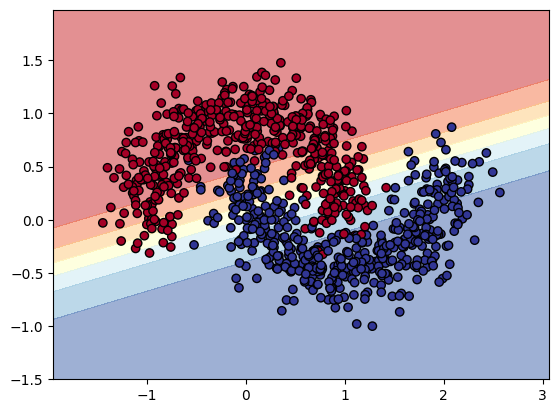

In [162]:
# Como último caso de prueba entrene una red para el dataset propuesto por su profesor. Use 80% para entrenamiento y 20% para pruebas. Explique los resultado.

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Generar dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# 2. Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Separar 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Transformar a formato de tu red: (features, m)
X_train_T = X_train.T
X_test_T = X_test.T
Y_train_T = y_train.reshape(1, -1)
Y_test_T = y_test.reshape(1, -1)

# 5. Crear red con tu clase DenseNN
#  arquitectura: entrada 2, oculta 8, salida 1
nn = DenseANN(
    layers=[2, 8, 1],
    learning_rate=0.1
)

print(nn)  # para ver el resumen de capas

# 6. Entrenar
costs = nn.train(
    X_train_T,
    Y_train_T,
    epochs=1500,
    print_cost=True,
    do_graphic=False
)

# 7. Evaluar
y_train_pred = nn.predict(X_train_T)
y_test_pred = nn.predict(X_test_T)

train_acc = (y_train_pred.flatten() == Y_train_T.flatten()).mean()
test_acc = (y_test_pred.flatten() == Y_test_T.flatten()).mean()

print("Accuracy entrenamiento:", train_acc)
print("Accuracy prueba:", test_acc)

# 8. Frontera de decisión
def plot_decision_boundary(model, scaler, X_orig, y_orig):
    x_min, x_max = X_orig[:,0].min() - 0.5, X_orig[:,0].max() + 0.5
    y_min, y_max = X_orig[:,1].min() - 0.5, X_orig[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid).T
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
    plt.scatter(X_orig[:,0], X_orig[:,1], c=y_orig, edgecolor="k", cmap=plt.cm.RdYlBu)
    plt.show()

plot_decision_boundary(nn, scaler, X, y)



# PARTE 2. USO DE FRAMEWORK PARA REDES NEURONALES

Para este apartado se va a hacer uso de una librería que brinda de manera simplificada un entrenamiento flexible de distintas redes neuronales. En este caso será **Keras**

> Keras proporciona una interfaz Python simplificada para TensorFlow y se ha convertido en uno de los framework más usados en redes neuronales; especialmente las profundas. Cualquier código Keras que escribas se ejecuta en en TensorFlow (también se pueden utilizar CNTK y Theano como *back-end*, pero el desarrollo de estos se ha detenido).

Keras ofrece dos API: una [API secuencial](https://keras.io/guides/sequential_model/) y una [API funcional](https://keras.io/guides/functional_api/). La primera es más sencilla y resulta suficiente para la mayoría de las redes neuronales. La segunda es útil en escenarios  como redes con topologías no secuenciales o de capas compartidas. En nuestro caso usaremos el API secuencial.

---
Resuelvan un problema de clasificación usando el *dataset* definido por su profesor. (70% entrenamiento, 10% validación y 20% pruebas)

##Paso 1: Definir el problema
Antes de desarrollar un modelo, es fundamental establecer qué se quiere lograr y cómo se medirá el éxito. Esto implica explicar el problema, elegir una métrica adeucada y establecer un umbral de desempeño.


*Incluyan la respuesta*

El problema consiste en clasificar imágenes de dígitos manuscritos (0–9) utilizando una red neuronal.  
- **Tipo de problema:** Clasificación multiclase.  
- **Métrica:** Accuracy (precisión).  
- **Umbral esperado:** Se espera obtener un accuracy mínimo del 90% en el conjunto de prueba.


##Paso 2: Explorar y preparar los datos
Para comprender la neturaleza de los datos que estamos utilizando es necesario **explorar** el *dataset* con visualizaciones adecuadas que permitan conocer la distribución de clases o valores, la presencia de valores nulos o atípicos y las correlaciones entre variables.

**Preparar** los datos para que la red pueda aprender de manera eficiente implica, entre otras cosas, la limpieza de datos, la normalización o estandarización de valores, la codificación de variables categóricas y la separación en conjuntos de entrenamiento (train), validación (dev) y prueba (test).

Forma de X_train: (60000, 28, 28)
Forma de y_train: (60000,)


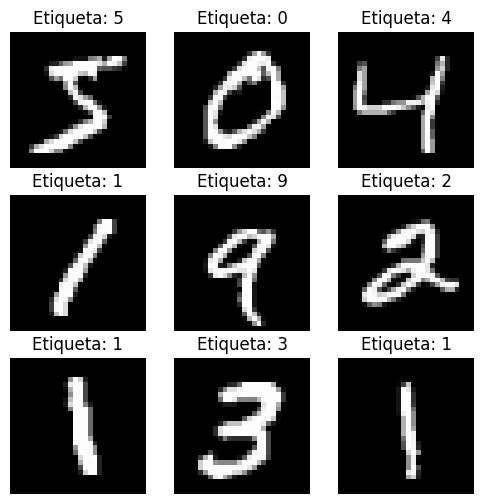

In [163]:
#Analizar los datos

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargar dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Forma de X_train:", X_train.shape)  # (60000, 28, 28)
print("Forma de y_train:", y_train.shape)  # (60000,)


# Visualizar algunas imágenes
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    # Reshape the image data to (height, width)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis("off")
plt.show()

*Incluyan observaciones**

El código anterior carga el conjunto de datos MNIST y muestra las primeras 9 imágenes junto con sus etiquetas. Esto nos permite visualizar el tipo de datos con los que se entrenará el modelo. Las imágenes son dígitos manuscritos en escala de grises (0-9).

In [164]:
#Preparar los datos separandolos en entrenamiento, validación y pruebas.

from tensorflow.keras.utils import to_categorical

# Normalizar (0-1)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Aplanar (de 28x28 a 784)
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# One-hot encoding etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Separar validación (10% del entrenamiento → 5000 ejemplos)
X_val, X_train = X_train[:5000], X_train[5000:]
y_val, y_train = y_train[:5000], y_train[5000:]

print("Entrenamiento:", X_train.shape, y_train.shape)
print("Validación:", X_val.shape, y_val.shape)
print("Prueba:", X_test.shape, y_test.shape)

Entrenamiento: (55000, 784) (55000, 10)
Validación: (5000, 784) (5000, 10)
Prueba: (10000, 784) (10000, 10)


##Paso 3: Desarrollar la red

### Paso 3.1: Definir el modelo Keras

Crear una red neuronal utilizando la API secuencial de Keras es sencillo.

1. Se crea una instancia de la clase Sequential.
2. Se llama a *add* en el objeto *Sequential* para añadir capas. Las capas en sí mismas son instancias de clases como Dense, que representa una capa totalmente conectada con un número específico de neuronas que utilizan una función de activación específica.

In [165]:
# Inicializar modelo Sequencial()
# Añadir capas de la clase Dense: .add(Dense(...))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(784,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Paso 3.2: Compilar el modelo Keras

Una vez inicializado el modelo, hay que compilarlo. Para esto hay que definir las propiedades adicionales necesarias para entrenar la red.

Se debe especificar minimamente:
1. la **función de pérdida** que se utilizará para evaluar un conjunto de pesos
2. el **optimizador** utilizado para buscar diferentes pesos para la red, que en la versión clásica se usa el *gradiente descendente*, pero existen otros famosos como *ADAM*
3. la **métrica** que se desea reportar durante el entrenamiento.

In [166]:
#Compilar el modelo
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


### Paso 3.3: Entrenar (Fit) el modelo Keras

Una vez compilado, es el momento de entrenar o ajustar el modelo con algunos datos. Para esto se hace llamando al método ***fit()*** del modelo.

Tenga en cuenta que el entrenamiento se realiza por épocas (*epoch*), y cada época se divide en lotes (*batch*).

1. **Epoch:** un ciclo/pasada por todas las observaciones del conjunto de datos de entrenamiento.
2. **Batch:** un ciclo de una o más observaciones en un *epoch* antes de que se actualicen los pesos.

In [167]:
#Entrenar el modelo

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8490 - loss: 0.5297 - val_accuracy: 0.9608 - val_loss: 0.1343
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9664 - loss: 0.1168 - val_accuracy: 0.9722 - val_loss: 0.0921
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9786 - loss: 0.0711 - val_accuracy: 0.9762 - val_loss: 0.0815
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9853 - loss: 0.0487 - val_accuracy: 0.9742 - val_loss: 0.0838
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9894 - loss: 0.0352 - val_accuracy: 0.9784 - val_loss: 0.0721
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9919 - loss: 0.0269 - val_accuracy: 0.9798 - val_loss: 0.0668
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9940 - loss: 0.0212 - val_accuracy: 0.9780 - val_loss: 0.0807
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0

### Paso 3.4: Evaluar el modelo Keras

Ya entrenada la red neuronal con todo el conjunto de datos de entrenamiento, se puede evaluar su rendimiento con otra serie de datos.

Para evaluar el modelo se puede hacer uso del método ***evaluate()*** agregandole los respectivos conjuntos de datos con su la salida esperada.

In [168]:
#Evaluar el modelo
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy en test: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9663 - loss: 0.1190
Accuracy en test: 97.23%


*Incluyan las conclusiones*

## RETROSPECTIVA

**1.** ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes? (Horas/Hombre)

*Juan Guayazan: 5 horas*
*Sergio Idarraga: horas*

**2.** ¿Cuál es el estado actual del laboratorio? ¿Por qué?

*Completo*

**3.** ¿Cuál consideran fue el mayor logro? ¿Por qué?

*Logramos implementar y entrenar desde cero una red neuronal, pudimos poner en practica aspectos teoricos y aterizarlo con teorias de aprendizaje autonomo*

**4.** ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?

*Teníamos un desconocimiento total de la forma de programar, por lo que fue necesario revisar documentación y ejemplos prácticos para comprender mejor la lógica y la estructura que debíamos implementar*

**5.** ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los resultados?

*Trabajamos bien en la distribución de tareas, comunicación continua y control de versiones del notebook*

**6**.¿Qué referencias usaron? ¿Cuál fue la más útil? Incluya citas con los estándares adecuados.


*   El dataset MNIST | Interactive Chaos. (n.d.). https://interactivechaos.com/es/manual/tutorial-de-deep-learning/el-dataset-mnist
*   Chollet, F. (2015). Keras. https://keras.io



*Incluyan las respuesta*